In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('drive/My Drive/Machine Learning Python/ML Algorithms/K Means/income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


### K Means

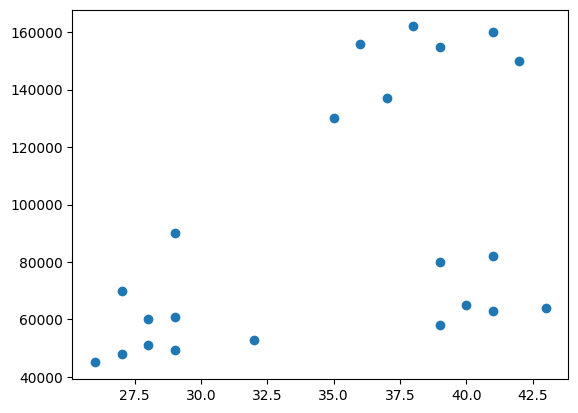

In [ ]:
# Scatterplot to visualize the data
plt.scatter(data['Age'], data['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [ ]:
# Get the predicted values
y_predicted = km.fit_predict(data[['Age', 'Income($)']])
print(y_predicted)

# Get predicted clusters, add new column in data frame.
data['cluster'] = y_predicted
data.head()

[2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


/tmp/ipython-input-415988649.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


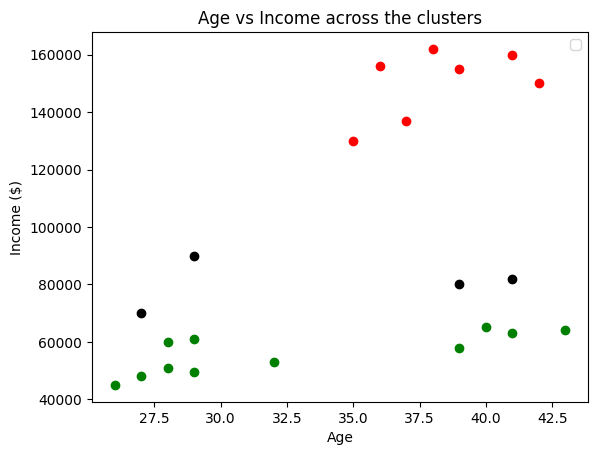

In [ ]:
# Split into 'k' dataframe to separate the data
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.title('Age vs Income across the clusters')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

The above visual demonstrates a common issue with clustering. Since the Age and Income are represented as two different scales, we must normalize our variables appropriately to ensure proper separation.

In [ ]:
# Scale the data appropriately.
scaler = MinMaxScaler()
data['Income($)'] = scaler.fit_transform(data[['Income($)']])
data['Age'] = scaler.fit_transform(data[['Age']])
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
# Apply KMeans on normalized data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
data['cluster'] = y_predicted

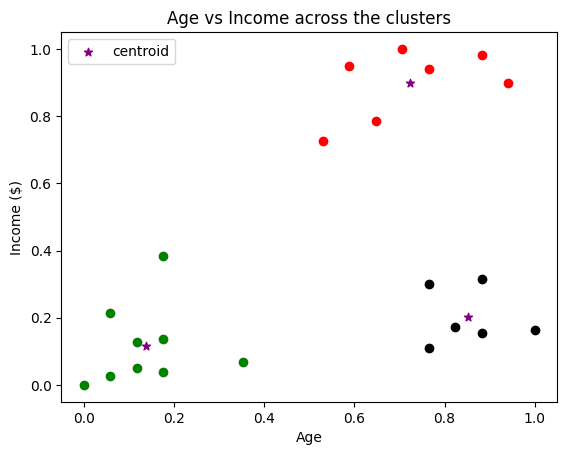

In [ ]:
# Split into 'k' dataframe to separate the data
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.title('Age vs Income across the clusters')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
# To access the centroid locations
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [ ]:
# Elbow Plot Method
k_rng = range(1, 10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(data[['Age', 'Income($)']])
  sse.append(km.inertia_) # Gives the SSE: km.inertia_

sse

[5.434011511988176,
 2.457133535904635,
 0.4750783498553095,
 0.3923766528801945,
 0.3071350418475291,
 0.2582506560719452,
 0.20882373373648916,
 0.1408795172510311,
 0.1099581688308657]

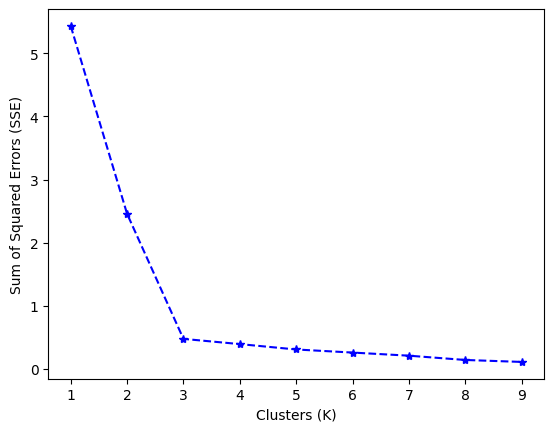

In [ ]:
plt.plot(k_rng, sse, color='blue', marker='*', linestyle="--")
plt.xlabel("Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()